In [22]:
import numpy as np
from numpy import roots
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pow, pi
from sympy import diff, symbols, cos, sin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
%matplotlib inline

### Уровень 0:

1. Создайте матрицу 3 на 3, заполненную числами от 1 до 9
2. Прибавьте к ней матрицу с единицами на диагонале
3. Умножьте полученную матрицу на вектор (1, 2, 3)
4. Посчитайте обратную матрицу к полученной матрице

In [2]:
x = np.linspace(1.0, 9.0, 9)
x = x.reshape(3, 3) # 1
x

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [5]:
y = np.eye(3)
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
z = x + y # 2
z

array([[ 2.,  2.,  3.],
       [ 4.,  6.,  6.],
       [ 7.,  8., 10.]])

In [8]:
q = np.array([1, 2, 3])
q

array([1, 2, 3])

In [10]:
#w = z @ q
w = np.dot(z, q) # 3
w

array([15., 34., 53.])

In [13]:
w_inv = np.linalg.inv(z) # 4
w_inv

array([[-6.00000000e+00, -2.00000000e+00,  3.00000000e+00],
       [-1.00000000e+00,  5.00000000e-01,  2.22044605e-17],
       [ 5.00000000e+00,  1.00000000e+00, -2.00000000e+00]])

### Уровень 1:
Дан объект в 2d пространстве.

При помощи матричных операций выполните:
1. Уменьшить объект в два раза
2. Повернуть на 130 градусов
3. Отразить объект относительно прямой y=x
4. Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

In [14]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]
A = np.array(A)

(-200, 200)

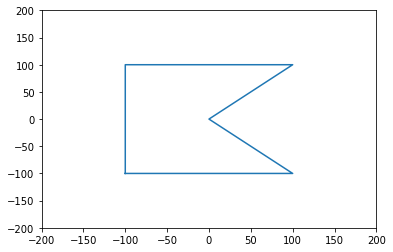

In [135]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [126]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

(-150, 150)

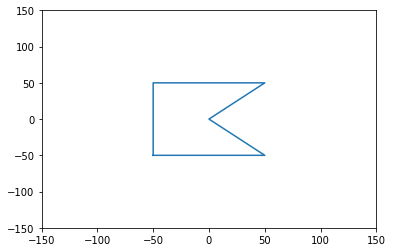

In [127]:
A2 = np.dot(A, TransformArray) # 1
x = A2[:,0]
y = A2[:,1]
plt.plot(x, y)
plt.ylim([-150, 150])
plt.xlim([-150, 150])

In [110]:
theta = math.radians(130)
TransformArray_turn = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

(-200, 200)

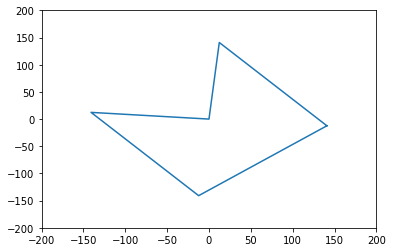

In [111]:
new_position = np.dot(A, TransformArray_turn) # 2 против часовой
x = new_position[:,0]
y = new_position[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [122]:
B = []
for point in A: # 2 по часовой
    new_position = np.dot(TransformArray_turn,np.transpose(point))
    B.append(new_position)
B = np.array(B)

(-200, 200)

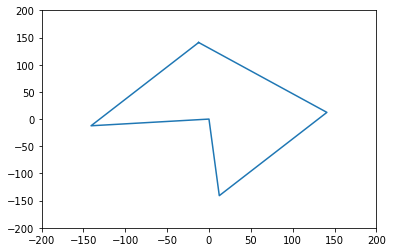

In [123]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [118]:
TransformArray_mirr = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

(-200, 200)

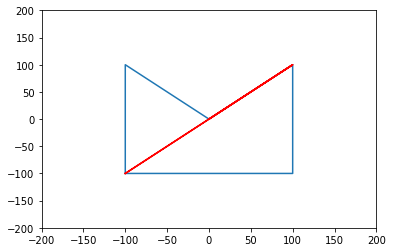

In [125]:
mirroring = np.dot(A, TransformArray_mirr) # 3 
x = mirroring[:,0]
y = mirroring[:,1]
plt.plot(x, y)
x = y
plt.plot(x, y, c='red')
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [138]:
TransformArray_offset = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [200, 300, 1]
])
TransformArray_scaling = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])
TransformArray_combined = np.dot(TransformArray_offset, TransformArray_scaling)

(-50, 500)

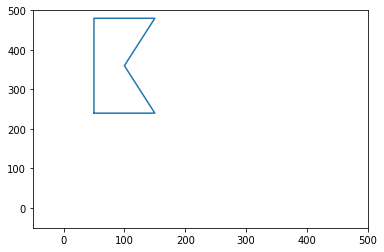

In [139]:
transA = np.dot(A, TransformArray_combined) # 4
x = transA[:,0]
y = transA[:,1]
plt.plot(x, y)
plt.ylim([-50, 500])
plt.xlim([-50, 500])